# Multivariable regression
#### Emile Badran U2 L4 P4

Using the [FBI:UCR Crime dataset](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls), build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.options.display.max_rows = 100000
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import Binarizer
from sklearn import linear_model

### Loading the data, fixing column names, and filling NANs:

In [2]:
data = pd.read_excel('fbi_ny_2013.xls', sheet_name=0, header=1, skiprows=3, skip_footer=3,
                     index_col=0, thousands=None)

data.columns = ['population', 'violent_crime',
       'murder',
       'rape', 'rape_legacy',
       'robbery', 'assault', 'property_crime', 'burglary',
       'larceny_theft', 'vehicle_theft', 'arson']
data.index.names = ['city']
data = data.fillna(0)
data = data.astype('int64')

df = data[['burglary','violent_crime','property_crime']]

### Filter values and convert to rates per 1000 inhabitants

In [3]:
df.burglary = (df.burglary / data.population) * 1000
df.violent_crime = (df.violent_crime / data.population) * 1000
df.property_crime = (df.property_crime / data.population) * 1000
df.head(n=2)

,burglary,violent_crime,property_crime
city,,,
Adams Village,1.075,0.000,6.448
Addison Town and Village,1.164,1.164,9.313


In [4]:
df.corr()

,burglary,violent_crime,property_crime
burglary,1.000,0.699,0.787
violent_crime,0.699,1.000,0.532
property_crime,0.787,0.532,1.000


### Grouping cities according to violent crime

In [5]:
df_upper = df.where(df.violent_crime >= df.violent_crime.quantile(q=0.75))
df_upper = df_upper.dropna()
df_upper.name = 'df_upper'

df_mid = df.where((df.violent_crime < df.violent_crime.quantile(q=0.75)) & (
    df.violent_crime > df.violent_crime.quantile(q=0.25)))
df_mid = df_mid.dropna()
df_mid.name = 'df_mid'

df_lower = df.where(df.violent_crime <= df.violent_crime.quantile(q=0.25))
df_lower = df_lower.dropna()
df_lower.name = 'df_lower'

dataframes = [df_upper, df_mid, df_lower]

### Running the regression to predict property crime

DF_UPPER


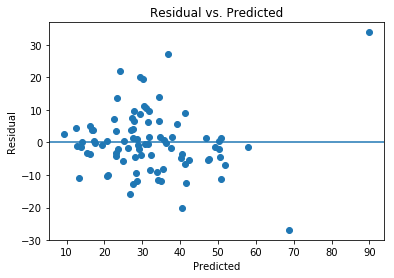

DF_MID


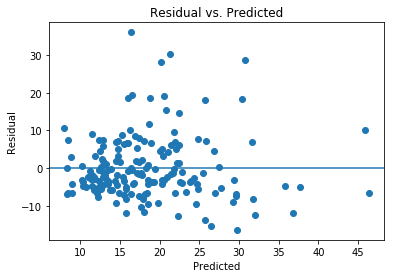

DF_LOWER


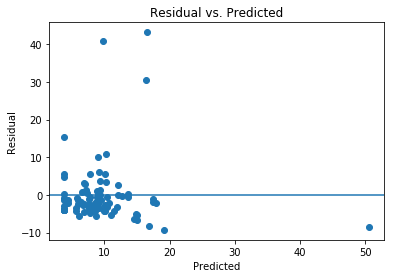

In [6]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

for dataframe in dataframes:
    Y = dataframe['property_crime'].values.reshape(-1, 1)
    X = dataframe[['burglary','violent_crime']]
    regr.fit(X, Y)

    print((dataframe.name.upper()))
    
    predicted = regr.predict(X).ravel()
    actual = dataframe['property_crime']

    residual = actual - predicted
    
    dataframe['predicted'] = predicted
    dataframe['residual'] = residual

    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()